## using namespace std;

In [1]:
%cd ~/projects/SPH_Simulator/

/home/rboyne/projects/SPH_Simulator


In [2]:
# logging setup
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

## Import

In [3]:
import json
import matplotlib.pyplot as plt

In [4]:
from sph.objects import Particle, System, Grid
from sph.functions import step_wave
from sph.solve import sph_iterate, euler_step

## Setup the system

In [5]:
SAVE_DIR = '/home/rboyne/projects/SPH_Simulator/raw_data/first_refac_run'

In [6]:
system = System(
    min_x=(0, 0),
    max_x=[20, 10], 
    dx=0.2,
    seed=20210501
)

In [7]:
print(system.summary)

@0.0s 	 Random State (4f6137fa67dc3f5ee11363d5b6999288) 	 system:2e5f30ee16172f4c137171ee7a698963 	 seed:20210501


In [8]:
with open(f'{SAVE_DIR}/system_0.json', 'w') as f:
    f.write(system.as_json())

In [9]:
!head -n 10 /home/rboyne/projects/SPH_Simulator/raw_data/first_refac_run/system_0.json

{
    "B": 57142.857142857145,
    "CFL": 0.2,
    "P_fac": 1.05,
    "P_ref": 23262.881294642884,
    "c0": 20.0,
    "d_ref": 0.18000000000000002,
    "d_srch": 0.52,
    "dt": 0.0013000000000000002,
    "dx": 0.2,


In [10]:
!wc -l /home/rboyne/projects/SPH_Simulator/raw_data/first_refac_run/system_0.json

36 /home/rboyne/projects/SPH_Simulator/raw_data/first_refac_run/system_0.json


## Setup the particles

In [11]:
grid = Grid(system, step_wave)
grid

Grid ([41. 22.]) with 2161 particles in system 2e5f3

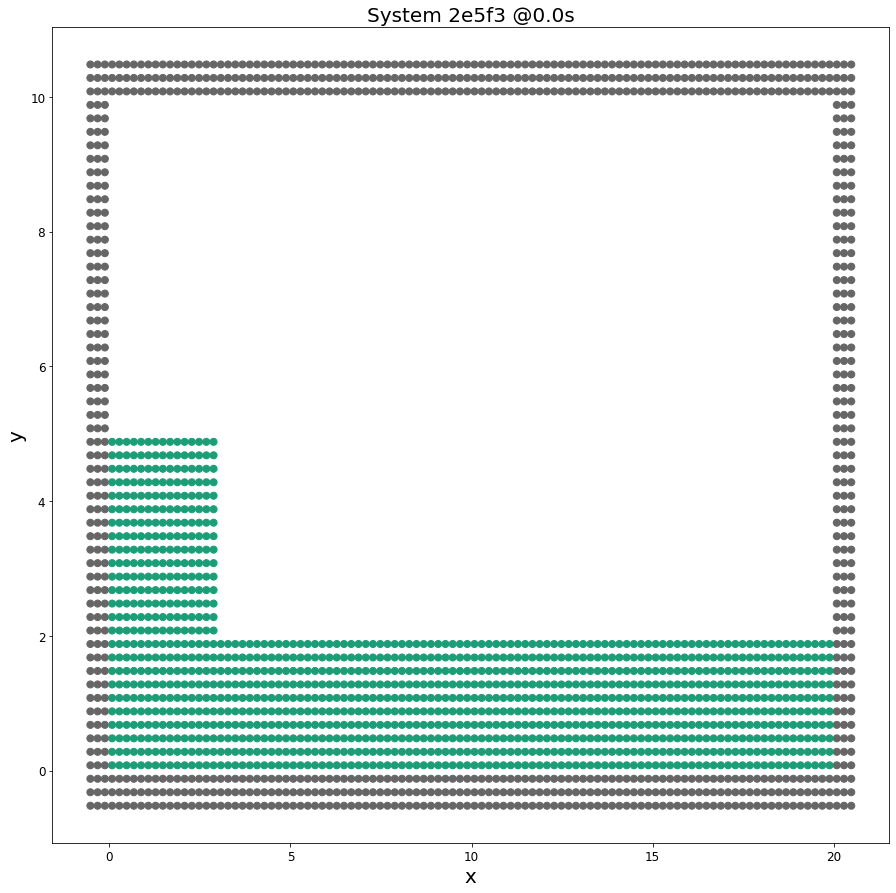

In [12]:
grid.plot()

In [13]:
plt.savefig(f'{SAVE_DIR}/figure_0.png')

<Figure size 1080x1080 with 0 Axes>

In [14]:
with open(f'{SAVE_DIR}/particles_0.csv', 'w') as f:
    f.write(grid.particle_csv)

In [15]:
!head -n 10 /home/rboyne/projects/SPH_Simulator/raw_data/first_refac_run/particles_0.csv

# Created @Sat May  1 22:41:05 2021 by team Southern
# @0.0s 	 Random State (4f6137fa67dc3f5ee11363d5b6999288) 	 system:2e5f30ee16172f4c137171ee7a698963 	 seed:20210501
# Grid ([41. 22.]) with 2161 particles in system 2e5f3
ID,x_x,x_y,v_x,v_y,a_x,a_y,m,D,P,rho,bound
1,-0.52,-0.52,0.0,0.0,0.0,0.0,40.00000000000001,0.0,0.0,1000.0,-1
2,-0.52,-0.32,0.0,0.0,0.0,0.0,40.00000000000001,0.0,0.0,1000.0,-1
3,-0.52,-0.12,0.0,0.0,0.0,0.0,40.00000000000001,0.0,0.0,1000.0,-1
4,-0.52,0.08000000000000007,0.0,0.0,0.0,0.0,40.00000000000001,0.0,0.0,1000.0,-1
5,-0.52,0.28,0.0,0.0,0.0,0.0,40.00000000000001,0.0,0.0,1000.0,-1
6,-0.52,0.48,0.0,0.0,0.0,0.0,40.00000000000001,0.0,0.0,1000.0,-1


In [16]:
!wc -l /home/rboyne/projects/SPH_Simulator/raw_data/first_refac_run/particles_0.csv

2164 /home/rboyne/projects/SPH_Simulator/raw_data/first_refac_run/particles_0.csv


## Iterate

In [17]:
sph_iterate(system, grid, euler_step, smooth_rho=False)

INFO:sph.solve:Updating Grid...
INFO:sph.solve:Resetting differentials...
INFO:sph.solve:Computing differentials...
INFO:sph.solve:Applying boundary forces...
INFO:sph.solve:Advancing particles...
INFO:sph.solve:Iteration finished!


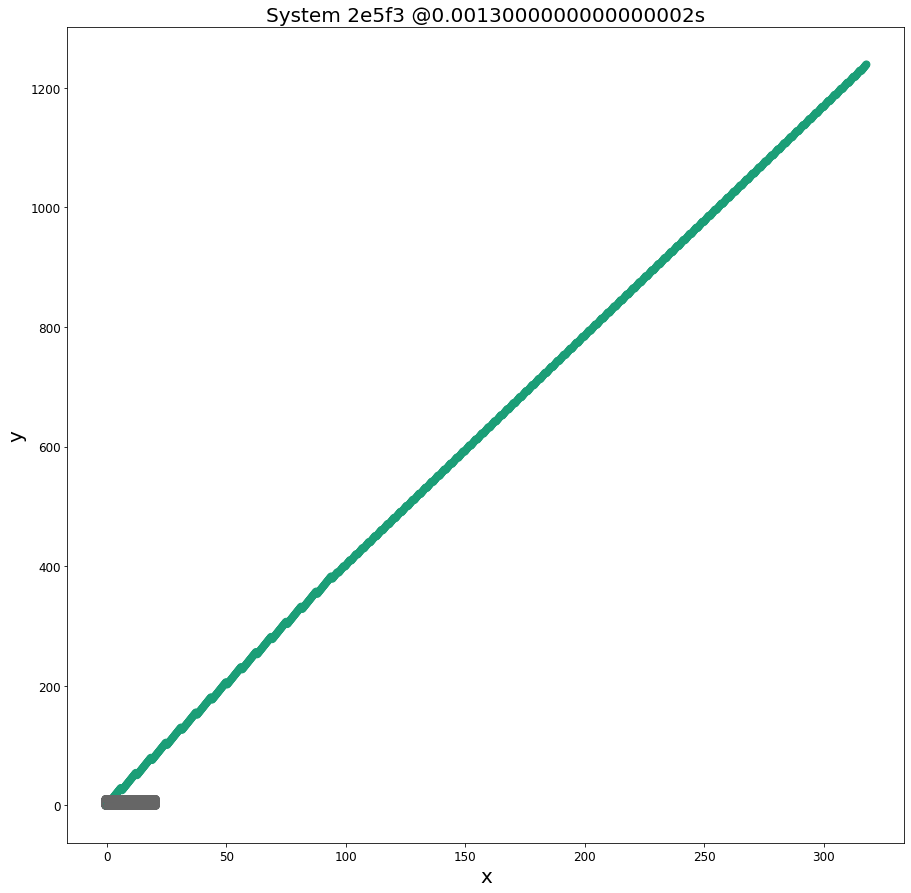

In [18]:
grid.plot()

In [19]:
plt.savefig(f'{SAVE_DIR}/figure_1.png')

<Figure size 1080x1080 with 0 Axes>